<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/master/landlab_header.png"></a>

# The deAlmeida Overland Flow Component 

<hr>
<small> For instructions on how to run an interactive iPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For the unexpanded version to download and run, click here: <a href="https://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/overland_flow/overland_flow_driver_unexpanded.ipynb">https://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/overland_flow/overland_flow_driver_unexpanded.ipynb</a></small><br>
<small>For more Landlab tutorials, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

This notebook illustrates running the deAlmeida overland flow component in an extremely simple-minded way on a real topography, then shows it creating a flood sequence along an inclined surface with an oscillating water surface at one end.

First, import what we'll need:

In [2]:
from __future__ import print_function

from landlab.components.overland_flow import OverlandFlow
from landlab.plot.imshow import imshow_grid
from landlab.plot.colors import water_colormap
from landlab import RasterModelGrid
from landlab.io.esri_ascii import read_esri_ascii
from matplotlib.pyplot import figure
import numpy as np
from time import time
%matplotlib inline

/Users/erkan/landlab/landlab/components/stream_power/stream_power.py:18: UserWarning: Unable to import stream_power extension module.
  warnings.warn('Unable to import stream_power extension module.')
/Users/erkan/landlab/landlab/components/gflex/flexure.py:35: UserWarning: gFlex not installed.
  warnings.warn("gFlex not installed.")
To use the gFlex component you must have gFlex installed on your machine.
For installation instructions see gFlex on GitHub:

  https://github.com/awickert/gFlex


Pick the initial and run conditions

In [3]:
run_time = 200           # duration of run, (s)
h_init = 0.05           # initial thin layer of water (m)
n = 0.05                  # roughness coefficient, (s/m^(1/3))
g = 9.8                   # gravity (m/s^2)
alpha = 0.7               # time-step factor (nondimensional; from Bates et al., 2010)
u = 0.4                   # constant velocity (m/s, de Almeida et al., 2012)
run_time_slices = (10,50,100)

Elapsed time starts at 1 second. This prevents errors when setting our boundary conditions.

In [4]:
elapsed_time = 1.0

Use Landlab methods to import an ARC ascii grid, and load the data into the field that the component needs to look at to get the data. This loads the elevation data, z, into a "field" in the grid itself, defined on the nodes.

In [5]:
rmg, z = read_esri_ascii('DEM_10m.asc')
rmg.add_field('node', 'topographic__elevation', z)
rmg.set_closed_boundaries_at_grid_edges(True, True, True, True)

We can get at this data with this syntax:

In [6]:
np.all(rmg.at_node['topographic__elevation'] == z)

True

Note that the boundary conditions for this grid mainly got handled with the final line of those three, but for the sake of completeness, we should probably manually "open" the outlet. We can find and set the outlet like this:

In [7]:
my_outlet_node = 1406 # This DEM was generated using Landlab and the outlet node ID was known
rmg.status_at_node[my_outlet_node] = 1  # 1 is the code for fixed value

Now initialize a couple more grid fields that the component is going to need:

In [8]:
rmg.add_zeros('node', 'water__depth')                   # water depth (m)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [9]:
rmg.at_node['water__depth'] += h_init

Let's look at our watershed topography

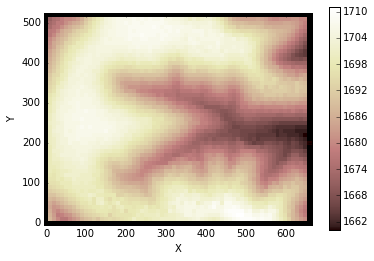

In [10]:
imshow_grid(rmg, 'topographic__elevation')

Now instantiate the component itself

In [11]:
of = OverlandFlow(rmg, steep_slopes = True) #for stability in steeper environments, we set the steep_slopes flag to True

Now we're going to run the loop that drives the component:

In [12]:
while elapsed_time < run_time:
    # First, we calculate our time step.
    dt = of.calc_time_step()
    # Now, we can generate overland flow.
    of.overland_flow()
    # Increased elapsed time
    print('Elapsed time: ', elapsed_time)
    elapsed_time += dt

Elapsed time:  1.0
Elapsed time:  10.9939025202
Elapsed time:  18.4429176521
Elapsed time:  24.5026111378
Elapsed time:  29.6466712313
Elapsed time:  34.1356793996
Elapsed time:  38.1284966783
Elapsed time:  41.7306762249
Elapsed time:  45.0170485313
Elapsed time:  48.0428030876
Elapsed time:  50.8496944461
Elapsed time:  53.4738807001
Elapsed time:  55.9409886125
Elapsed time:  58.2719876304
Elapsed time:  60.4883251576
Elapsed time:  62.6084920291
Elapsed time:  64.646299835
Elapsed time:  66.6319582175
Elapsed time:  68.5953535358
Elapsed time:  70.5467509445
Elapsed time:  72.48491325
Elapsed time:  74.4162940728
Elapsed time:  76.3408837212
Elapsed time:  78.2566105627
Elapsed time:  80.1403406542
Elapsed time:  81.9588131282
Elapsed time:  83.7161631433
Elapsed time:  85.416133421
Elapsed time:  87.0626609013
Elapsed time:  88.6590659829
Elapsed time:  90.2044550448
Elapsed time:  91.7036516675
Elapsed time:  93.1623777878
Elapsed time:  94.5868384615
Elapsed time:  95.9830888788

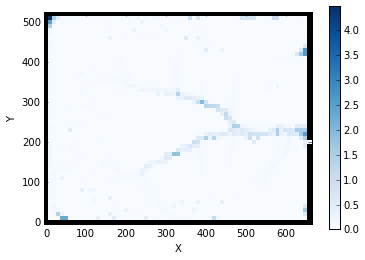

In [13]:
imshow_grid(rmg, 'water__depth', cmap='Blues')

Now let's get clever, and run a set of time slices:

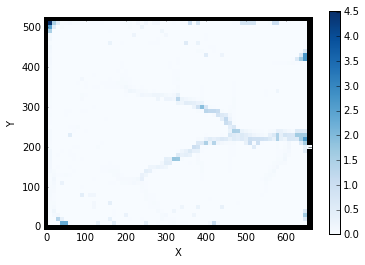

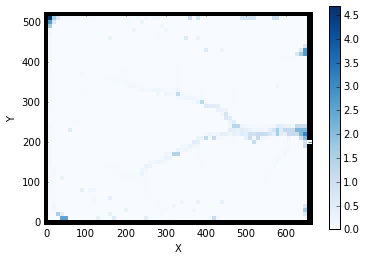

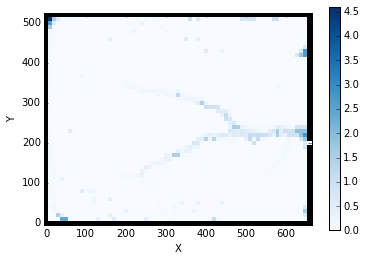

In [14]:
elapsed_time = 1.
for t in run_time_slices:
    while elapsed_time < t:
        # First, we calculate our time step.
        dt = of.calc_time_step()
        # Now, we can generate overland flow.
        of.overland_flow()
        # Increased elapsed time
        elapsed_time += dt
    figure(t)
    imshow_grid(rmg, 'water__depth', cmap='Blues')

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>